In [92]:
# import the library
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import imageio
import os
from IPython.display import Image, display

In [93]:
# read the data 
df = pd.read_csv("Udemy Courses.csv")

In [94]:
# print shape of the data
df.shape

(3682, 11)

In [95]:
# print top 5 rows of the data
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [96]:
# check the missing value in the data
df.isna().any()

course_id              False
course_title           False
is_paid                False
price                  False
num_subscribers        False
num_reviews            False
num_lectures           False
level                  False
content_duration       False
published_timestamp    False
subject                False
dtype: bool

In [97]:
# print the column names
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [98]:
# print the duplicate value
df.duplicated().any()

True

DATA ANALYSIS


In [99]:
# List out all the courses that are related with Python
df[df.course_title.str.contains('Python', case = True)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11T22:09:24Z,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08T00:46:14Z,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08T20:57:35Z,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29T00:58:43Z,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09T19:51:50Z,Web Development
1932,1038538,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22T00:11:22Z,Web Development
1969,902888,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,7 hours,2016-07-13T21:40:32Z,Business Finance
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09T15:37:56Z,Web Development
2295,1063722,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2 hours,2017-01-18T21:53:34Z,Web Development
2341,546848,Learn to code in Python and learn Adobe Photos...,True,50,1132,1,29,All Levels,2 hours,2015-07-08T00:15:12Z,Graphic Design


C:\Users\MARG\AppData\Local\Temp\ipykernel_30652\3160570131.py:28: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



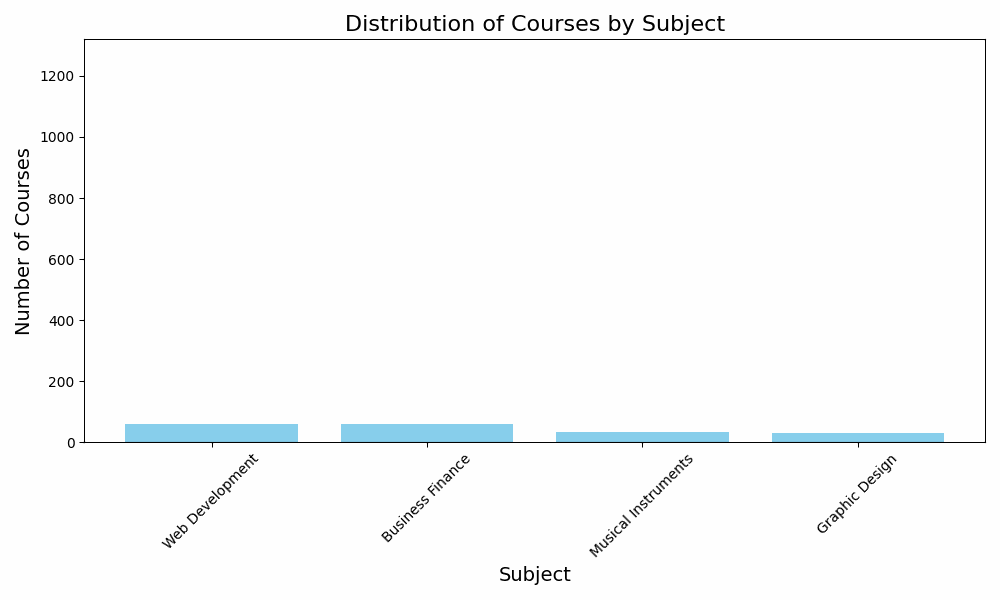

In [100]:
# which subject has the maximum number of courses
sub = df.subject.value_counts()

# Create a directory for saving frames
os.makedirs("frames", exist_ok=True)

# Number of steps for animation
steps = 20
frames = []
for step in range(1, steps + 1):
    plt.figure(figsize=(10, 6))
    
    # Scale the bar heights gradually
    scaled_values = sub.values * (step / steps)
    plt.bar(sub.index, scaled_values, color='skyblue')
    
    # Customize the plot
    plt.title('Distribution of Courses by Subject', fontsize=16)
    plt.xlabel('Subject', fontsize=14)
    plt.ylabel('Number of Courses', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylim(0, sub.max() * 1.1)  # Set consistent y-axis limit
    plt.tight_layout()
    
    # Save the frame
    filename = f"frames/frame_{step}.png"
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()

# Create the GIF
gif_path = "subject_bar_chart_animation.gif"
imageio.mimsave(gif_path, frames, duration=0.2)  # 0.2 seconds per frame for smooth animation

# Clean up the frames directory (optional)
for frame in os.listdir("frames"):
    os.remove(os.path.join("frames", frame))
os.rmdir("frames")

# Display the GIF in the Jupyter Notebook
display(Image(filename=gif_path))

In [101]:
# Show all the courses which are free of cost
df[df.is_paid == False]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15T00:21:56Z,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18T17:01:40Z,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03T17:45:31Z,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments


In [102]:
# show all courses which are paid
df[df.is_paid == True]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development


In [103]:
# plot a graph to show the percentage of paid vs non paid courses

is_paid = df.is_paid.value_counts()
fig = px.pie(labels=is_paid.index, 
             values=is_paid.values,
             title="Percentage of Paid vs Non paid courses",
             names=is_paid.index,
             hole=0.4,)
 
fig.update_traces(textposition='inside', textfont_size= 15, textinfo='percent')
 
fig.show()


In [104]:
#  What are all different subjects for which Udemy is offering courses?
different_sub = df.subject.unique()
different_sub

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

C:\Users\MARG\AppData\Local\Temp\ipykernel_30652\222505211.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




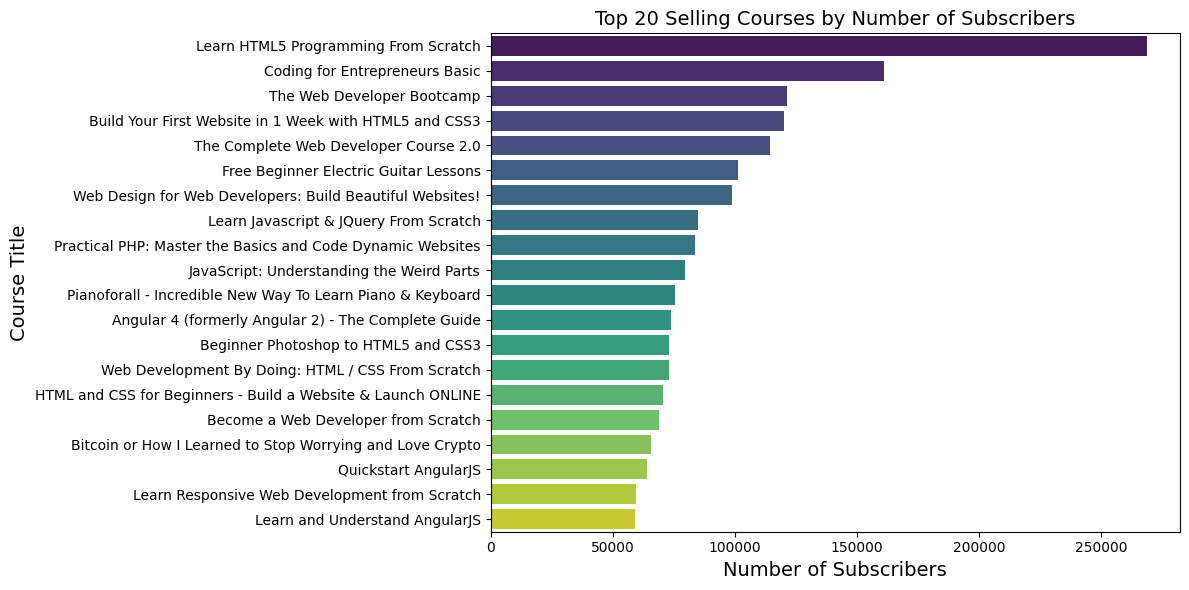

In [105]:
# which are top selling course
top_selling_course = df.sort_values('num_subscribers', ascending = False).head(20)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='num_subscribers',
    y='course_title',
    data=top_selling_course,
    palette='viridis'
)

# Add titles and labels
plt.title('Top 20 Selling Courses by Number of Subscribers', fontsize=14)
plt.xlabel('Number of Subscribers', fontsize=14)
plt.ylabel('Course Title', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\MARG\AppData\Local\Temp\ipykernel_30652\2020876926.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




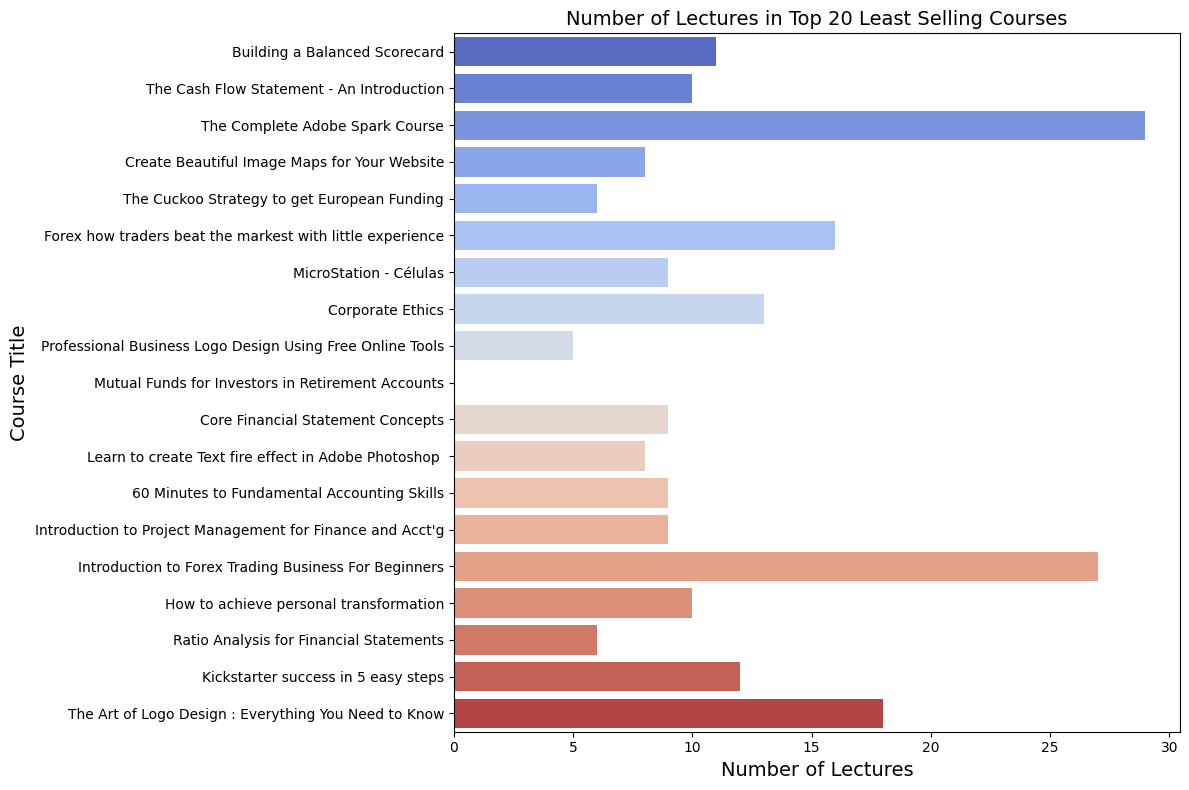

In [106]:
# what are least selling courses
least_selling_courses = df.sort_values("num_subscribers", ascending = True).head(20)
least_selling_courses

# As number of subscribers for first 20 is zero so we can Visualize the number of lectures (num_lectures) in the least-selling courses to explore the course structure.

# Create a bar plot showing the number of lectures for these courses
plt.figure(figsize=(12, 8))
sns.barplot(
    x='num_lectures',
    y='course_title',
    data=least_selling_courses,
    palette='coolwarm'
)

# Add titles and labels
plt.title('Number of Lectures in Top 20 Least Selling Courses', fontsize=14)
plt.xlabel('Number of Lectures', fontsize=14)
plt.ylabel('Course Title', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [107]:
# Show all courses of graphic design where the price is below 100
df[(df.subject == "Graphic Design") & (df.price < '100')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [108]:
#  Show all the courses of web development where the price is above 50?
# Filter the DataFrame for courses in 'Web Development' with price > 50
filtered_df = df[(df.subject == "Web Development") & (df.price > '50')]

# Create the animated bubble chart
fig = px.scatter(
    filtered_df,
    x="num_subscribers",
    y="price",
    size="num_reviews",
    color="level",  # Replace with 'subject' or another variable if 'level' has limited categories
    hover_name="course_title",
    title="Web Development Courses: Price vs. Subscribers Over Time",
    labels={
        "num_subscribers": "Number of Subscribers",
        "price": "Price ($)",
        "num_reviews": "Number of Reviews",
        "level": "Course Level",
    },
    height=600
)

# Display the chart
fig.show()

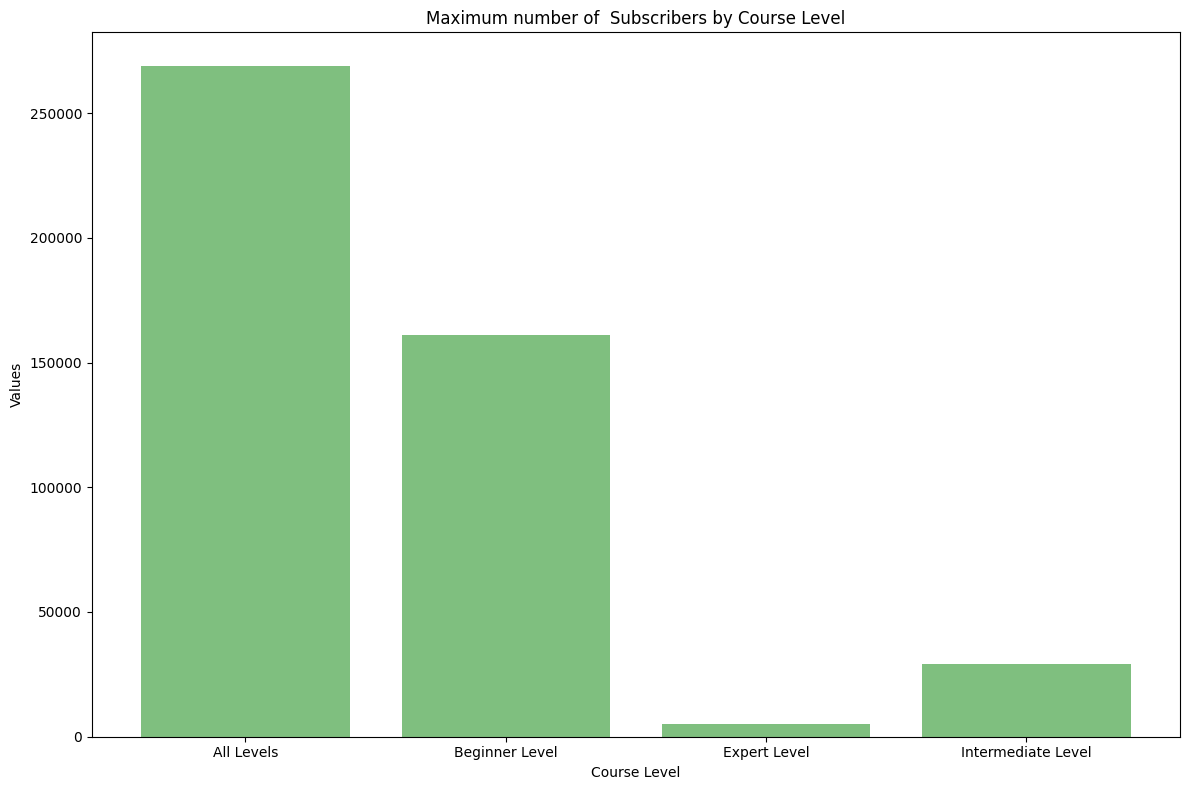

In [109]:
# What are the maximum number of subscribers for each level of courses?
df.level.unique()

# data.groupby('level') - syntax to create a group in any column.
# ['num_subscribers'] - syntax to work on second column.

df.groupby('level')['num_subscribers'].max()

level = df.groupby("level").max()

# Create the bar plot using Seaborn to show the maximum values
plt.figure(figsize=(12, 8))

# Bar plot for 'num_subscribers'
plt.bar(level.index, level['num_subscribers'], color='green', alpha=0.5, label='Subscribers')

# Customize the plot (optional)
plt.title('Maximum number of  Subscribers by Course Level')
plt.xlabel('Course Level')
plt.ylabel('Values')

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure the labels fit
plt.show()

In [110]:
# What are courses that published in year 2015?
# check the data type of the data

df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

C:\Users\MARG\AppData\Local\Temp\ipykernel_30652\1222907940.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




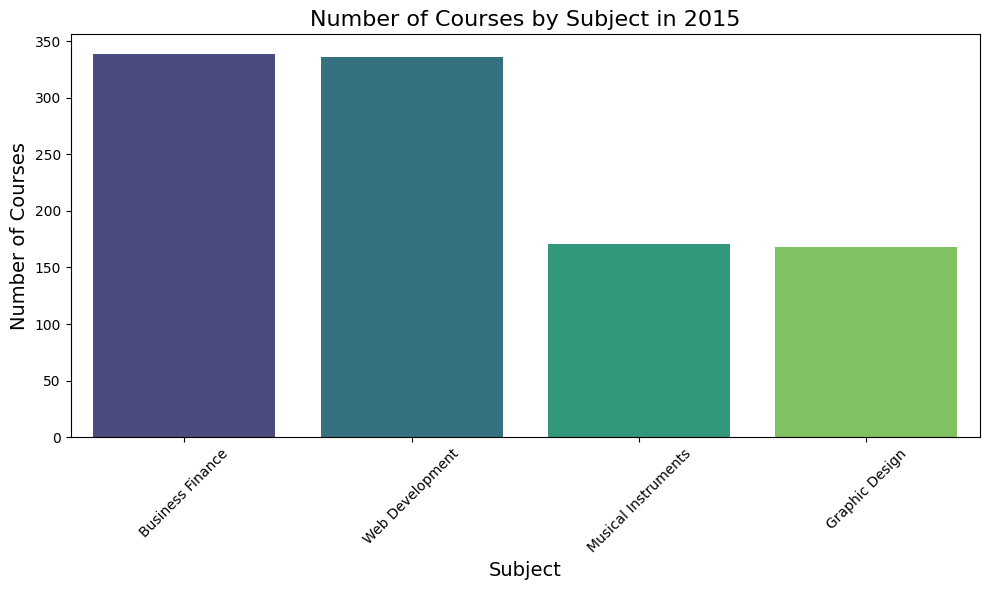

In [111]:
# change the data type of the published_timestamp column 
df["published_timestamp"] = pd.to_datetime(df.published_timestamp)

# create a new column name year in the data
df["Year"] = df['published_timestamp'].dt.year

# now print the year column 
courses_2015 = df[df.Year == 2015]

# Count the number of courses by subject
subject_counts = courses_2015['subject'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette="viridis")

# Add labels and title
plt.title('Number of Courses by Subject in 2015', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()